#### Best Contributing Features For Passenger Satisfaction

#### 1. Using Fielter Method

#### 1.1 Mutual Information

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# ---- Step 1: Load Data ----
data = pd.read_csv("balanced_dataset.csv")  # Ensure this dataset is preprocessed and scaled

# ---- Step 2: Define Features and Target ----
X = data.drop("Satisfaction_Satisfied", axis=1)  # Features
y = data["Satisfaction_Satisfied"]               # Target

# ---- Step 3: Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- Step 4: Mutual Information Feature Selection ----
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Create a DataFrame of scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# ---- Step 5: Display Top Features ----
print("Top 10 Contributing Features Based on Mutual Information:")
print(mi_df.head(10))

Top 10 Contributing Features Based on Mutual Information:
                    Feature  MI Score
0                       Age  0.313598
14              Total Delay  0.171821
17  Type of Travel_Personal  0.169341
18                Class_Eco  0.166300
11      Call Center Service  0.164011
9           Baggage Service  0.161332
8          Onboard Services  0.160867
12          Departure Delay  0.159821
10     Immigration Security  0.159336
3        Immediate Transfer  0.159049


#### Plot Feature Importance

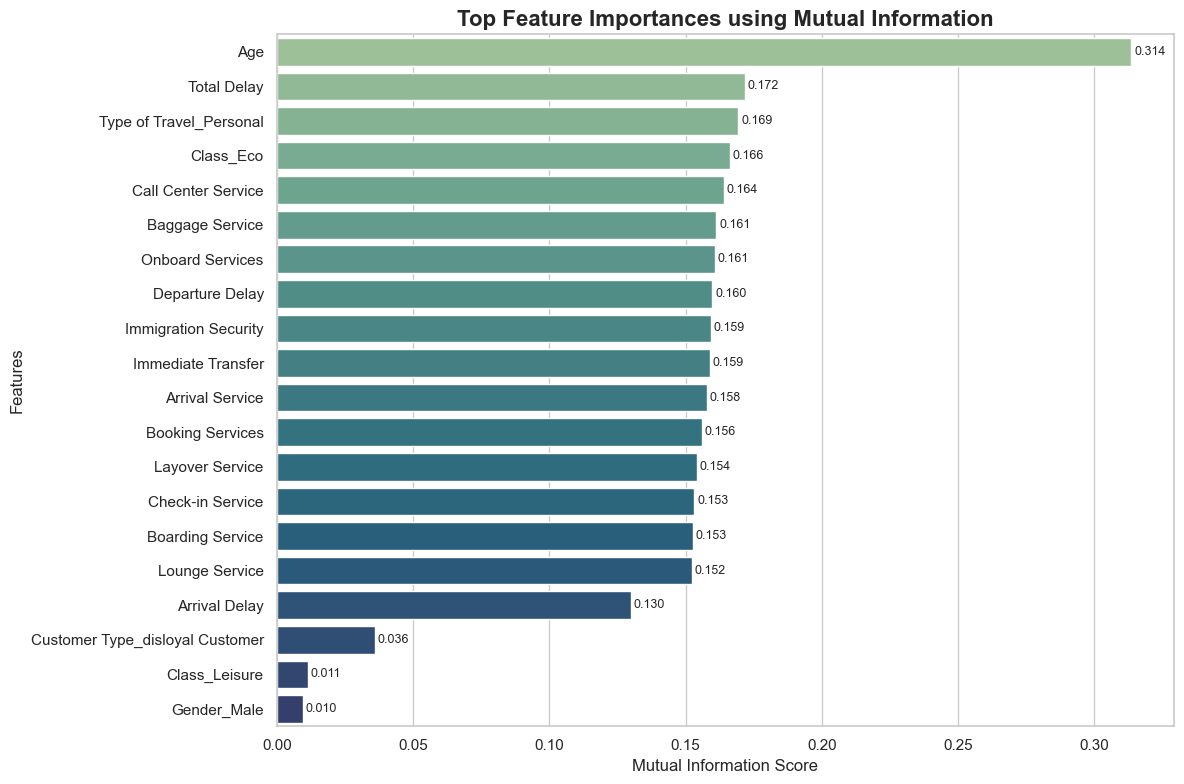

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# ---- Step 6: Enhanced Plot Feature Importance ----
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Barplot with annotations
ax = sns.barplot(
    x="MI Score", y="Feature", data=mi_df,
    palette="crest"
)

# Annotate MI scores on bars
for i, score in enumerate(mi_df["MI Score"]):
    ax.text(score + 0.001, i, f"{score:.3f}", va='center', fontsize=9)

# Titles and labels
plt.title("Top Feature Importances using Mutual Information", fontsize=16, fontweight='bold')
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


#### 1.2 Apply Correlation-Based Feature Selection

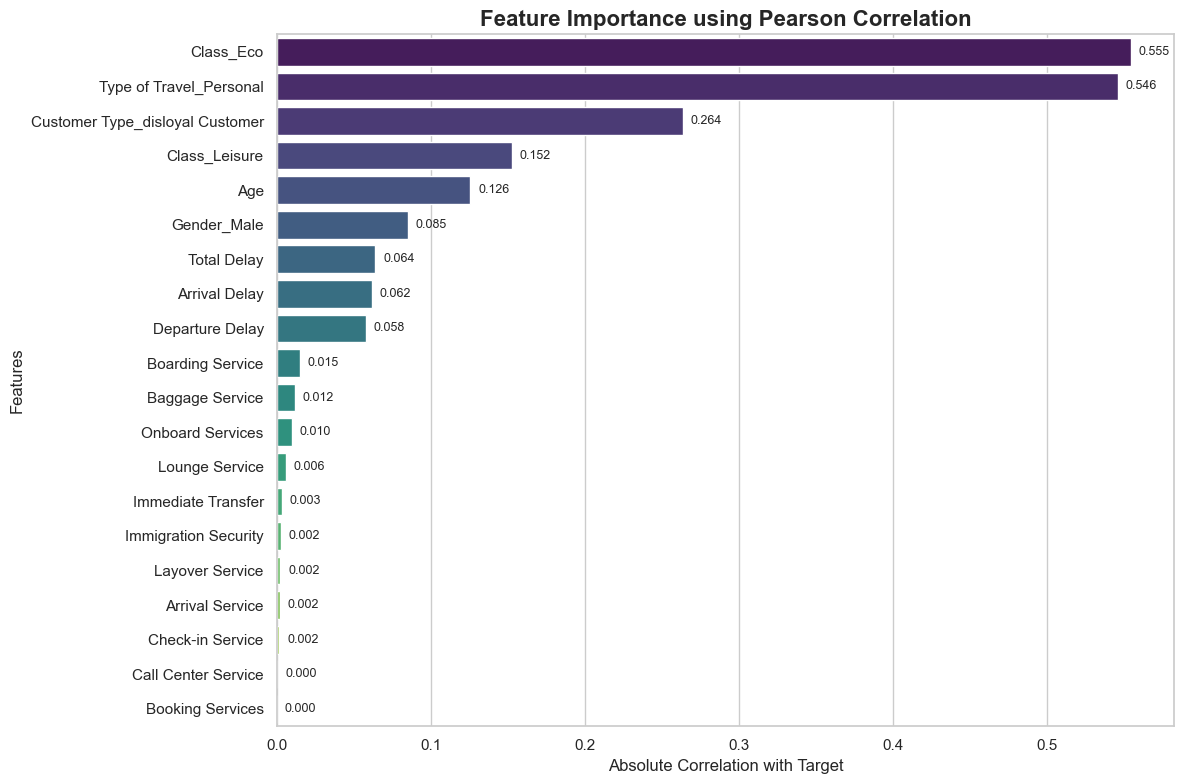

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ---- Step 1: Load Data ----
data = pd.read_csv("balanced_dataset.csv")

# ---- Step 2: Split into Features and Target ----
X = data.drop("Satisfaction_Satisfied", axis=1)
y = data["Satisfaction_Satisfied"]

# Convert target variable to numeric (1 for 'Satisfied', 0 for 'Dissatisfied')
y = y.map({'Satisfied': 1, 'Dissatisfied': 0})

# Optional: Split for modeling consistency later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---- Step 3: Compute Correlation with Target ----
correlation_scores = X.corrwith(y)

# ---- Step 4: Create Sorted DataFrame ----
corr_df = correlation_scores.abs().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature', 'Correlation']

# ---- Step 5: Plot Feature Importance using Correlation ----
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Barplot
ax = sns.barplot(x="Correlation", y="Feature", data=corr_df, palette="viridis")

# Annotate bars
for i, val in enumerate(corr_df["Correlation"]):
    ax.text(val + 0.005, i, f"{val:.3f}", va='center', fontsize=9)

# Titles and labels
plt.title("Feature Importance using Pearson Correlation", fontsize=16, fontweight='bold')
plt.xlabel("Absolute Correlation with Target", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
data.columns

Index(['Age', 'Arrival Service', 'Booking Services', 'Immediate Transfer',
       'Lounge Service', 'Check-in Service', 'Boarding Service',
       'Layover Service', 'Onboard Services', 'Baggage Service',
       'Immigration Security', 'Call Center Service', 'Departure Delay',
       'Arrival Delay', 'Total Delay', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal',
       'Class_Eco', 'Class_Leisure', 'Satisfaction_Satisfied'],
      dtype='object')

#### Combined Visualization with Subplots

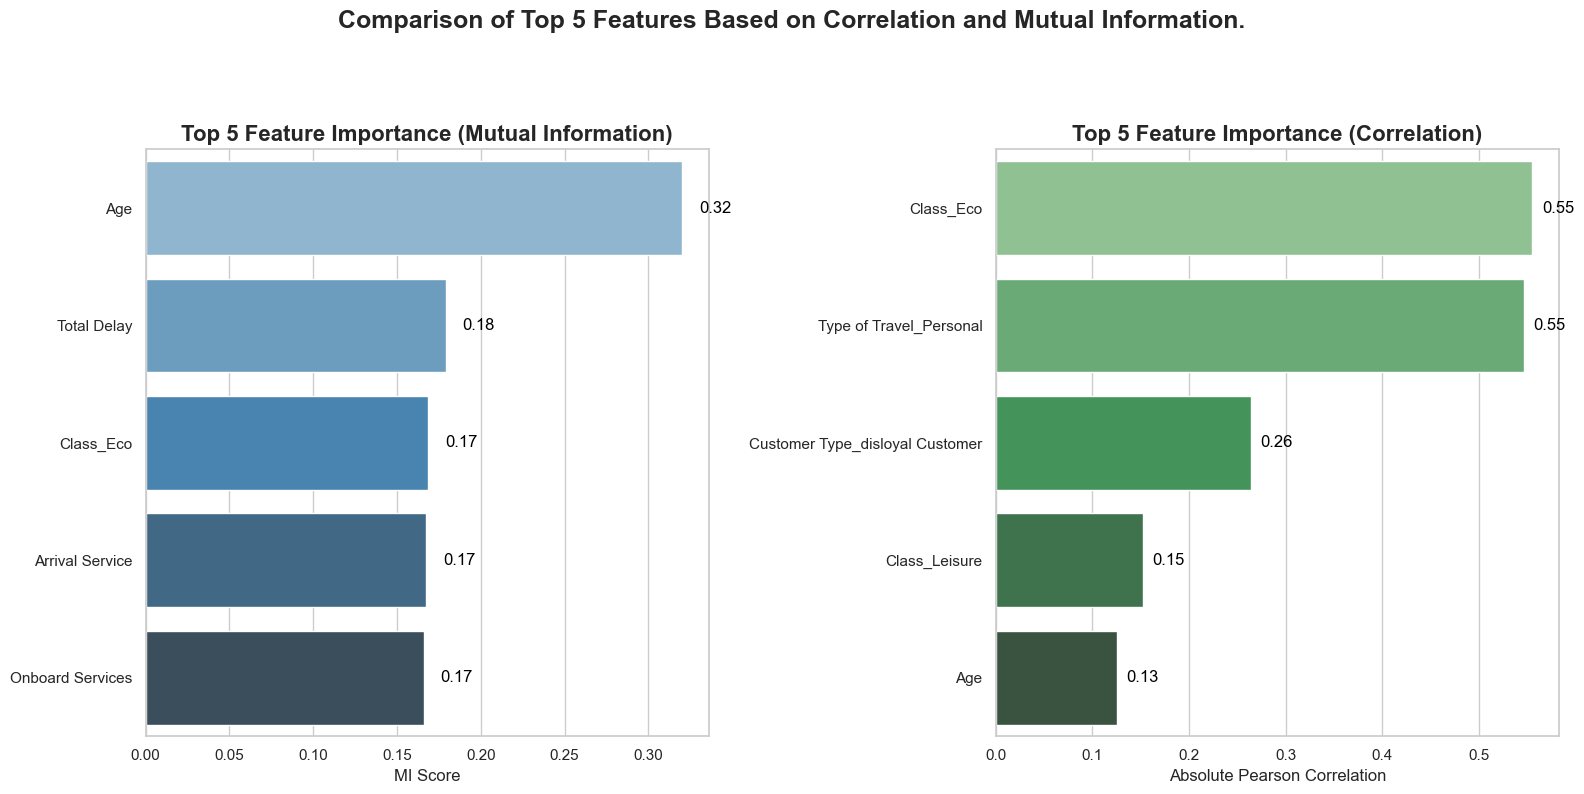

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# ---- Load and Split Data ----
data = pd.read_csv("balanced_dataset.csv")
X = data.drop("Satisfaction_Satisfied", axis=1)

# Convert the target variable to numeric (1 for 'Satisfied', 0 for 'Dissatisfied')
y = data["Satisfaction_Satisfied"].map({'Satisfied': 1, 'Dissatisfied': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ---- Mutual Information Scores ----
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

# ---- Correlation Scores ----
correlation_scores = X.corrwith(y)
corr_df = correlation_scores.abs().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature', 'Correlation']

# ---- Select Top 5 Features ----
mi_top5 = mi_df.head(5)  # Top 5 features from Mutual Information
corr_top5 = corr_df.head(5)  # Top 5 features from Correlation

# ---- Plotting ----
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# --- Subplot 1: Mutual Information (Top 5) ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='MI Score', y='Feature', data=mi_top5, palette='Blues_d')
plt.title('Top 5 Feature Importance (Mutual Information)', fontsize=16, fontweight='bold')
plt.xlabel('MI Score', fontsize=12)
plt.ylabel('')
# Adding values on the bars with an offset for small bars
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{width:.2f}', (width + 0.01, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12, color='black')

# --- Subplot 2: Correlation (Top 5) ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Correlation', y='Feature', data=corr_top5, palette='Greens_d')
plt.title('Top 5 Feature Importance (Correlation)', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Pearson Correlation', fontsize=12)
plt.ylabel('')
# Adding values on the bars with an offset for small bars
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{width:.2f}', (width + 0.01, p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=12, color='black')

# --- Common Layout ---
plt.suptitle('Comparison of Top 5 Features Based on Correlation and Mutual Information.', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 2. Wrapper Method

#### 2.1 Recursive Feature Elimination + Loggestic Reggression

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed, for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model (Logistic Regression for example)
model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust n_features_to_select as needed

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get the ranking of features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Visualize the feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

Selected Features: Index(['Total Delay', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal', 'Class_Eco', 'Class_Leisure'],
      dtype='object')


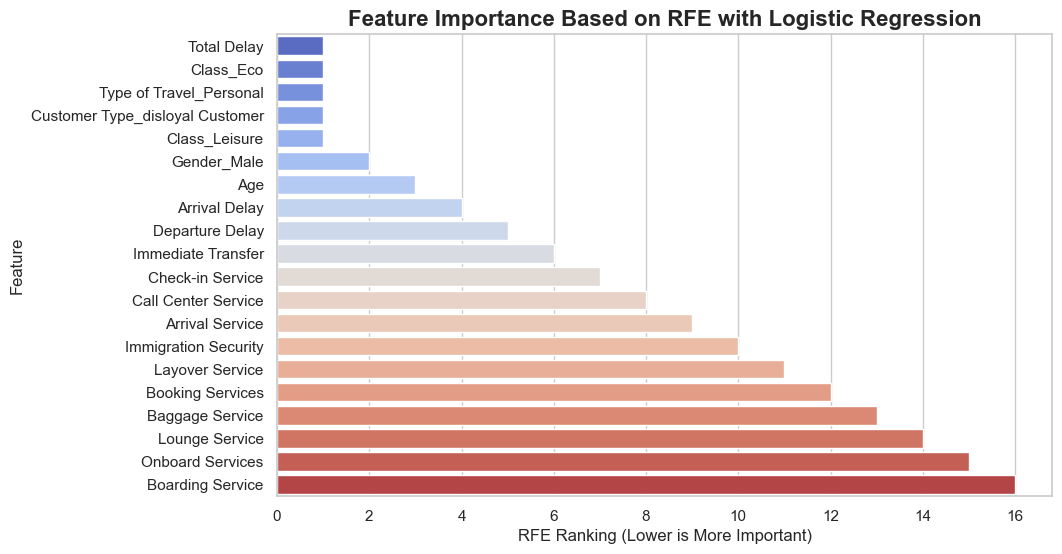

              precision    recall  f1-score   support

Dissatisfied       0.86      0.79      0.82      3015
   Satisfied       0.80      0.87      0.84      2983

    accuracy                           0.83      5998
   macro avg       0.83      0.83      0.83      5998
weighted avg       0.83      0.83      0.83      5998



In [15]:
# Plot the feature importance (ranking)
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_rankings, palette='coolwarm')  # Changed palette to 'coolwarm'
plt.title('Feature Importance Based on RFE with Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('RFE Ranking (Lower is More Important)')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Print the classification report
print(classification_report(y_test, y_pred))


#### RFE + Random Forest

Selected Features: Index(['Age', 'Baggage Service', 'Total Delay', 'Type of Travel_Personal',
       'Class_Eco'],
      dtype='object')


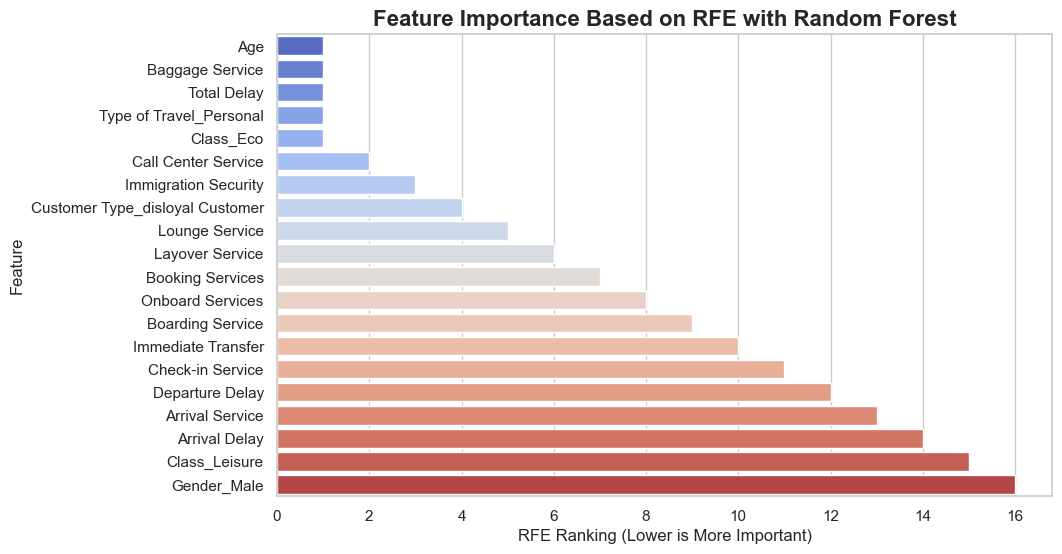

              precision    recall  f1-score   support

Dissatisfied       0.85      0.80      0.83      3015
   Satisfied       0.81      0.86      0.84      2983

    accuracy                           0.83      5998
   macro avg       0.83      0.83      0.83      5998
weighted avg       0.83      0.83      0.83      5998



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the Random Forest model
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust n_features_to_select as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Get the ranking of features
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

# Visualize the feature rankings
feature_rankings = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})
feature_rankings = feature_rankings.sort_values(by='Ranking')

# Plot the feature importance (ranking)
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_rankings, palette='coolwarm')  # You can choose a different color palette
plt.title('Feature Importance Based on RFE with Random Forest',fontsize=16, fontweight='bold')
plt.xlabel('RFE Ranking (Lower is More Important)')
plt.ylabel('Feature')
plt.show()

# Evaluate the model on the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# Print the classification report
print(classification_report(y_test, y_pred))


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg_model = LogisticRegression()

# RFE with Random Forest
rfe_rf = RFE(estimator=rf_model, n_features_to_select=5)
rfe_rf.fit(X_train, y_train)

# RFE with Logistic Regression
rfe_log_reg = RFE(estimator=log_reg_model, n_features_to_select=5)
rfe_log_reg.fit(X_train, y_train)

# Get the selected features for both models
selected_features_rf = X.columns[rfe_rf.support_]
selected_features_log_reg = X.columns[rfe_log_reg.support_]

# Create a DataFrame to hold the rankings
feature_rankings_rf = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_rf.ranking_
})
feature_rankings_log_reg = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_log_reg.ranking_
})

# Sort by rankings to get top 5 features
feature_rankings_rf = feature_rankings_rf.sort_values(by='Ranking').head(5)
feature_rankings_log_reg = feature_rankings_log_reg.sort_values(by='Ranking').head(5)

# Evaluate both models on the selected features
X_train_selected_rf = X_train[selected_features_rf]
X_test_selected_rf = X_test[selected_features_rf]
X_train_selected_log_reg = X_train[selected_features_log_reg]
X_test_selected_log_reg = X_test[selected_features_log_reg]

# Fit and predict with Random Forest
rf_model.fit(X_train_selected_rf, y_train)
y_pred_rf = rf_model.predict(X_test_selected_rf)

# Fit and predict with Logistic Regression
log_reg_model.fit(X_train_selected_log_reg, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_selected_log_reg)

# Print classification reports for both models
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Random Forest Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.85      0.80      0.83      3015
   Satisfied       0.81      0.86      0.84      2983

    accuracy                           0.83      5998
   macro avg       0.83      0.83      0.83      5998
weighted avg       0.83      0.83      0.83      5998

Logistic Regression Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.86      0.80      0.83      3015
   Satisfied       0.81      0.87      0.84      2983

    accuracy                           0.84      5998
   macro avg       0.84      0.84      0.84      5998
weighted avg       0.84      0.84      0.84      5998



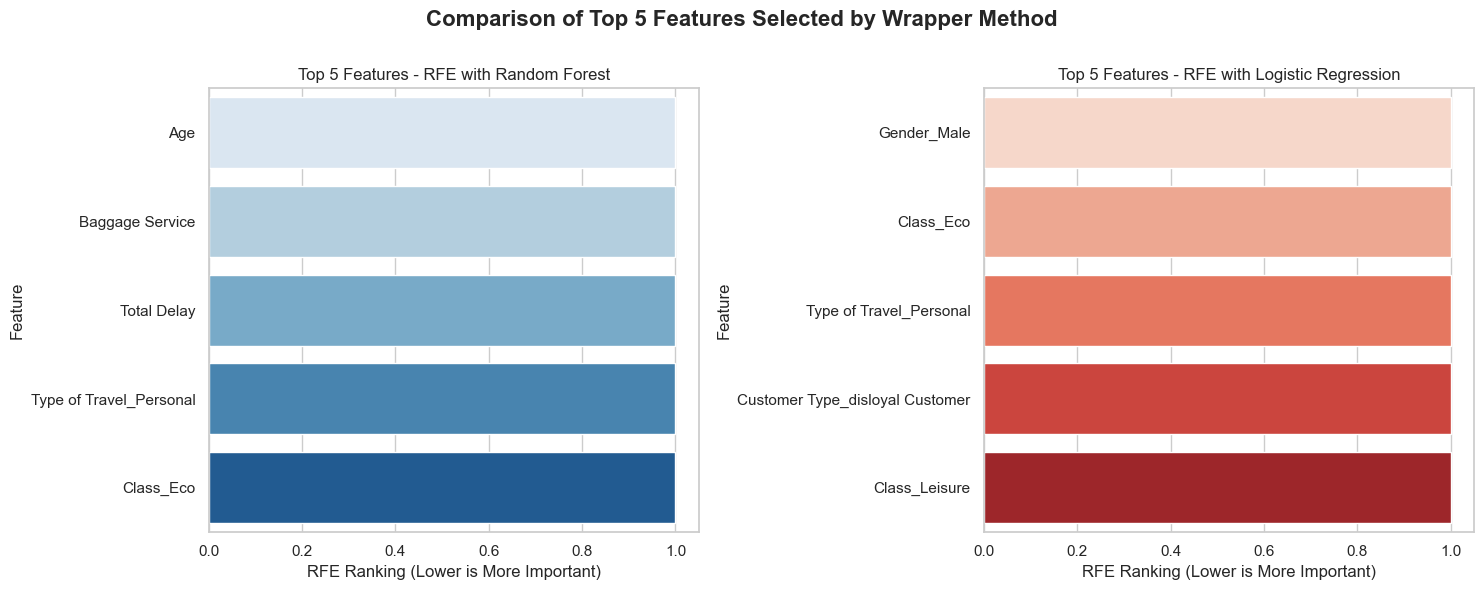

In [18]:
# Plot the top 5 features for both Random Forest and Logistic Regression in subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for Random Forest with a different color palette
sns.barplot(x='Ranking', y='Feature', data=feature_rankings_rf, ax=axes[0], palette='Blues')
axes[0].set_title('Top 5 Features - RFE with Random Forest')
axes[0].set_xlabel('RFE Ranking (Lower is More Important)')
axes[0].set_ylabel('Feature')

# Plot for Logistic Regression with a different color palette
sns.barplot(x='Ranking', y='Feature', data=feature_rankings_log_reg, ax=axes[1], palette='Reds')
axes[1].set_title('Top 5 Features - RFE with Logistic Regression')
axes[1].set_xlabel('RFE Ranking (Lower is More Important)')
axes[1].set_ylabel('Feature')

# Add a common title for both subplots
plt.suptitle('Comparison of Top 5 Features Selected by Wrapper Method', fontsize=16, fontweight='bold')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top space to make room for the title

plt.show()


#### 3. Embedded Methods for Feature Selection

Top features selected by Lasso:
              Feature  Coefficient
0                 Age         -0.0
1     Arrival Service         -0.0
2    Booking Services         -0.0
3  Immediate Transfer          0.0
4      Lounge Service          0.0


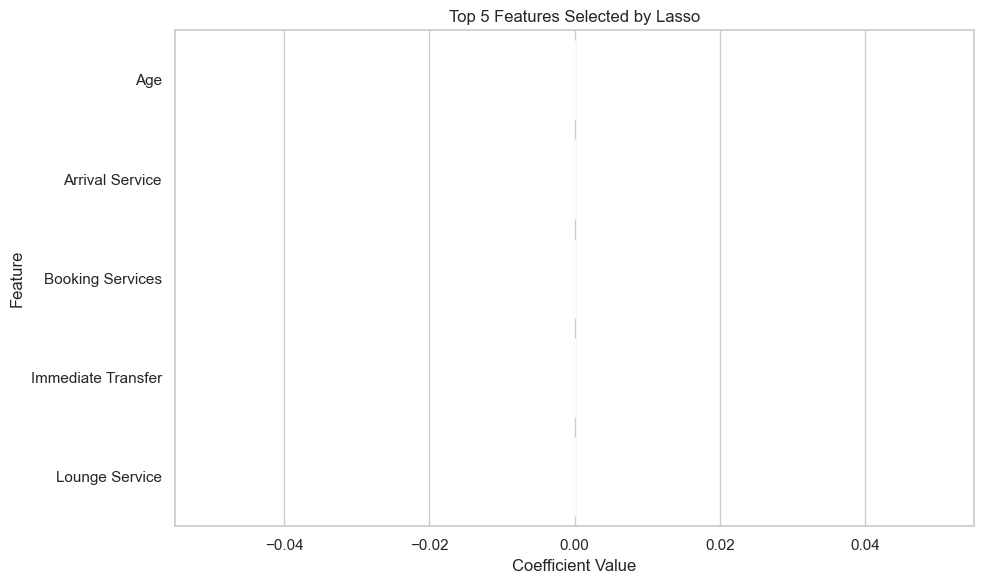

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Convert target variable to numeric (1 for 'Satisfied', 0 for 'Dissatisfied')
y = y.map({'Satisfied': 1, 'Dissatisfied': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- 1. Lasso Feature Selection -----------
lasso = Lasso(alpha=0.01)  # Adjust alpha to control regularization strength
lasso.fit(X_train_scaled, y_train)

# Get the absolute coefficients of features
lasso_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Sort by coefficient magnitude (higher values mean more importance)
lasso_coefs = lasso_coefs.sort_values(by='Coefficient', ascending=False)

# Display the most important features based on Lasso
print("Top features selected by Lasso:")
print(lasso_coefs.head(5))

# Plot Lasso feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefs.head(5), palette='viridis')
plt.title('Top 5 Features Selected by Lasso')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Top features selected by Random Forest:
                            Feature  Importance
17          Type of Travel_Personal    0.197108
18                        Class_Eco    0.169988
0                               Age    0.083648
16  Customer Type_disloyal Customer    0.068055
11              Call Center Service    0.035731


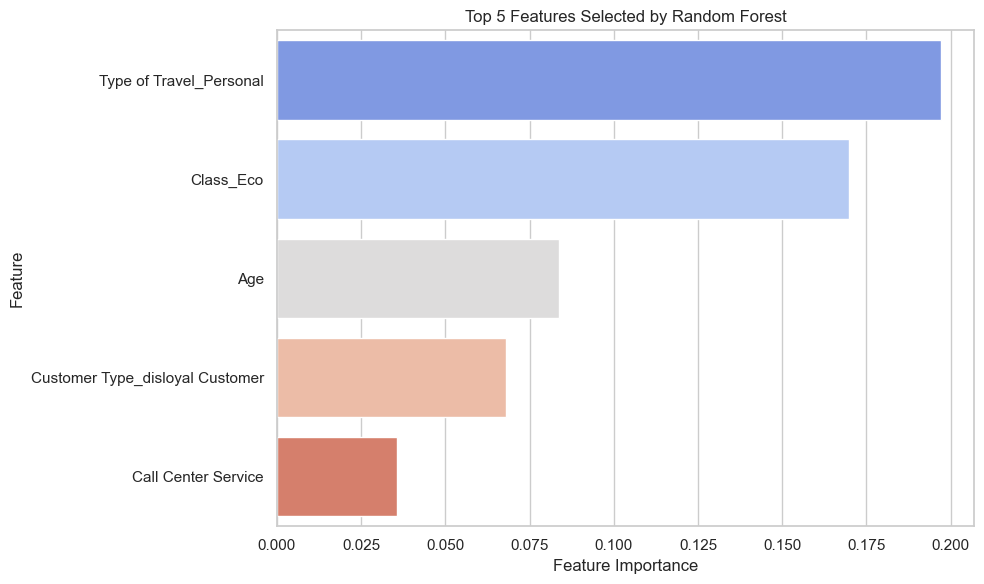

Random Forest Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.90      0.89      0.89      3015
   Satisfied       0.89      0.89      0.89      2983

    accuracy                           0.89      5998
   macro avg       0.89      0.89      0.89      5998
weighted avg       0.89      0.89      0.89      5998



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Assuming 'Satisfaction_Satisfied' is your target column and other columns are features
X = dataset.drop('Satisfaction_Satisfied', axis=1)  # Features
y = dataset['Satisfaction_Satisfied']  # Target

# Convert target variable to numeric (1 for 'Satisfied', 0 for 'Dissatisfied')
y = y.map({'Satisfied': 1, 'Dissatisfied': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- 2. Random Forest Feature Importance -----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort by importance (higher values mean more important)
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important features based on Random Forest
print("Top features selected by Random Forest:")
print(rf_feature_importances.head(5))

# Plot Random Forest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importances.head(5), palette='coolwarm')
plt.title('Top 5 Features Selected by Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Convert numerical predictions (1, 0) back to 'Satisfied' and 'Dissatisfied'
y_pred_rf = pd.Series(y_pred_rf).map({1: 'Satisfied', 0: 'Dissatisfied'})

print("Random Forest Classification Report:")
print(classification_report(y_test.map({1: 'Satisfied', 0: 'Dissatisfied'}), y_pred_rf))


#### Plotting top 5 features In Subplots

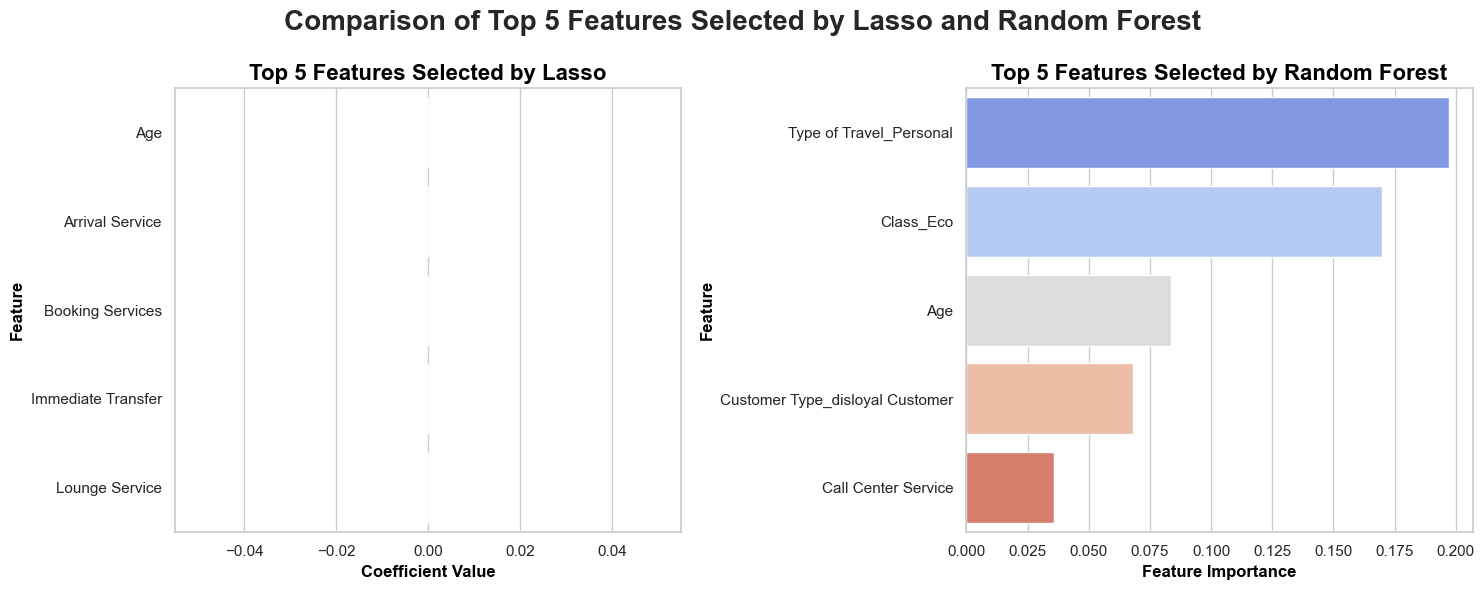

Random Forest Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.90      0.89      0.89      3015
   Satisfied       0.89      0.89      0.89      2983

    accuracy                           0.89      5998
   macro avg       0.89      0.89      0.89      5998
weighted avg       0.89      0.89      0.89      5998

Lasso (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.86      0.81      0.83      3015
   Satisfied       0.82      0.87      0.84      2983

    accuracy                           0.84      5998
   macro avg       0.84      0.84      0.84      5998
weighted avg       0.84      0.84      0.84      5998



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Load your dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Ensure this is the correct path

# Features and target
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied'].map({'Satisfied': 1, 'Dissatisfied': 0})  # Convert to numeric

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------- 1. Lasso Feature Selection -----------
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

lasso_coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

# ----------- 2. Random Forest Feature Importance -----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ----------- Plot Top 5 Features for Lasso and Random Forest -----------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='Coefficient', y='Feature', data=lasso_coefs.head(5), ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Features Selected by Lasso', fontsize=16, fontweight='bold', color='black')
axes[0].set_xlabel('Coefficient Value', fontsize=12, color='black', fontweight='bold')
axes[0].set_ylabel('Feature', fontsize=12, color='black', fontweight='bold')

sns.barplot(x='Importance', y='Feature', data=rf_feature_importances.head(5), ax=axes[1], palette='coolwarm')
axes[1].set_title('Top 5 Features Selected by Random Forest', fontsize=16, fontweight='bold',color='black')
axes[1].set_xlabel('Feature Importance', fontsize=12, color='black', fontweight='bold')
axes[1].set_ylabel('Feature', fontsize=12, color='black', fontweight='bold')

plt.suptitle('Comparison of Top 5 Features Selected by Lasso and Random Forest', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# ----------- Model Evaluation -----------

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf = pd.Series(y_pred_rf).map({1: 'Satisfied', 0: 'Dissatisfied'})

print("Random Forest Classification Report:")
print(classification_report(y_test.map({1: 'Satisfied', 0: 'Dissatisfied'}), y_pred_rf))

# Lasso via Logistic Regression
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = log_reg_lasso.predict(X_test_scaled)
y_pred_lasso = pd.Series(y_pred_lasso).map({1: 'Satisfied', 0: 'Dissatisfied'})

print("Lasso (Logistic Regression) Classification Report:")
print(classification_report(y_test.map({1: 'Satisfied', 0: 'Dissatisfied'}), y_pred_lasso))

#### 4. Feature Selection with Random Forest and XGBoost

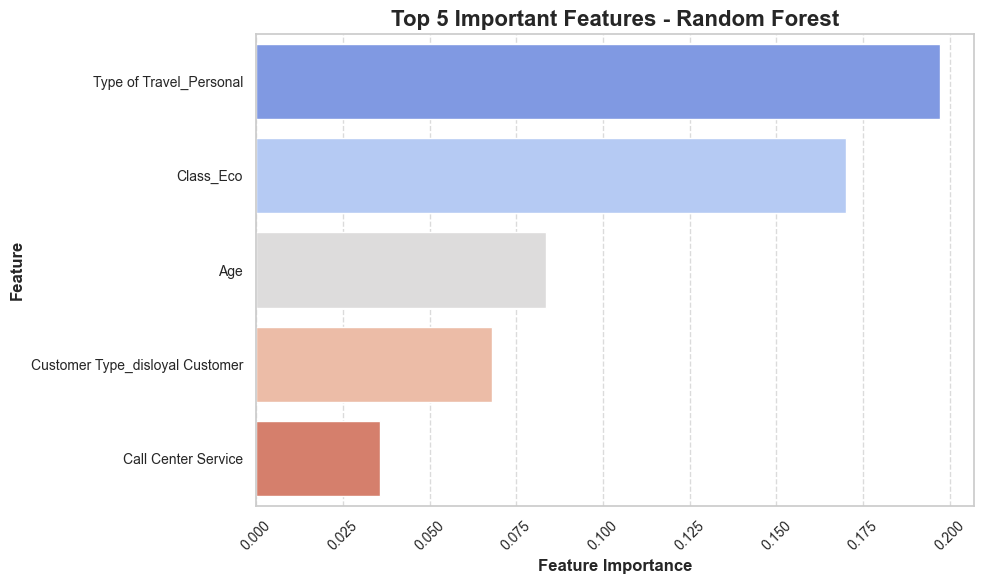

Classification Report using Top 5 Features (Random Forest):
              precision    recall  f1-score   support

Dissatisfied       0.90      0.82      0.86      3015
   Satisfied       0.84      0.91      0.87      2983

    accuracy                           0.86      5998
   macro avg       0.87      0.87      0.86      5998
weighted avg       0.87      0.86      0.86      5998



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Make sure path is correct
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(5), palette='coolwarm')
plt.title('Top 5 Important Features - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

# Select top 5 features
top_features = feat_imp_df['Feature'].head(5).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train again using only top 5 features
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train)
y_pred = rf_top.predict(X_test_top)

# Classification report
print("Classification Report using Top 5 Features (Random Forest):")
print(classification_report(y_test, y_pred))


#### XGBoost for Feature Selection

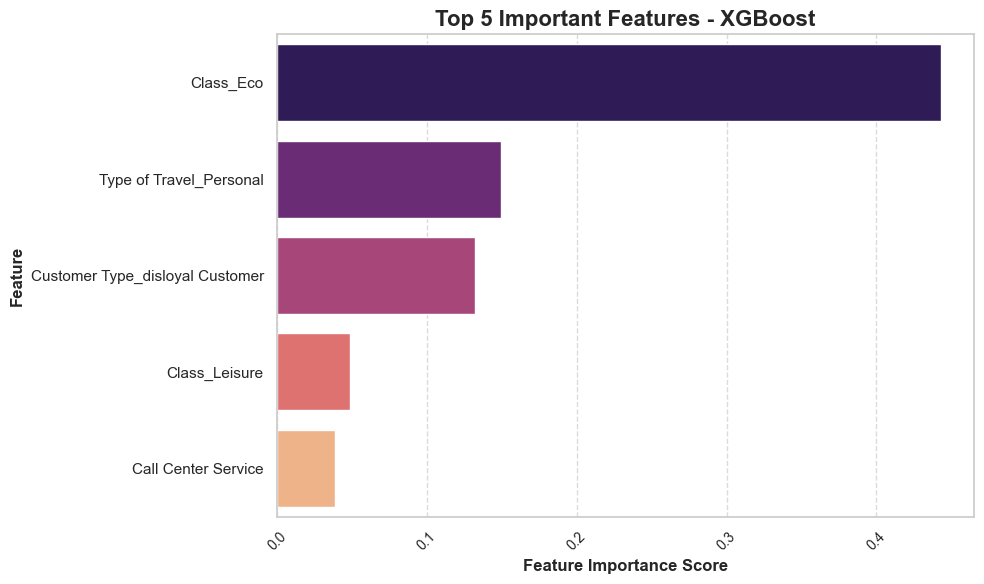

Classification Report using Top 5 Features (XGBoost):
              precision    recall  f1-score   support

Dissatisfied       0.89      0.84      0.86      3015
   Satisfied       0.84      0.90      0.87      2983

    accuracy                           0.87      5998
   macro avg       0.87      0.87      0.87      5998
weighted avg       0.87      0.87      0.87      5998



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Load dataset
dataset = pd.read_csv('balanced_dataset.csv')

# Convert target labels to binary values: Satisfied = 1, Dissatisfied = 0
dataset['Satisfaction_Satisfied'] = dataset['Satisfaction_Satisfied'].map({'Satisfied': 1, 'Dissatisfied': 0})

# Split features and target
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot top 5 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(5), palette='magma')
plt.title('Top 5 Important Features - XGBoost', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Select top 5 features
top_features = feat_imp_df['Feature'].head(5).tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain and evaluate using top 5 features
xgb_top = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_top.fit(X_train_top, y_train)
y_pred = xgb_top.predict(X_test_top)

# Classification report with human-readable labels
y_test_labels = y_test.map({1: 'Satisfied', 0: 'Dissatisfied'})
y_pred_labels = pd.Series(y_pred).map({1: 'Satisfied', 0: 'Dissatisfied'})

print("Classification Report using Top 5 Features (XGBoost):")
print(classification_report(y_test_labels, y_pred_labels))


#### Feature Importance with XGBoost and Random Forest (Subplot)

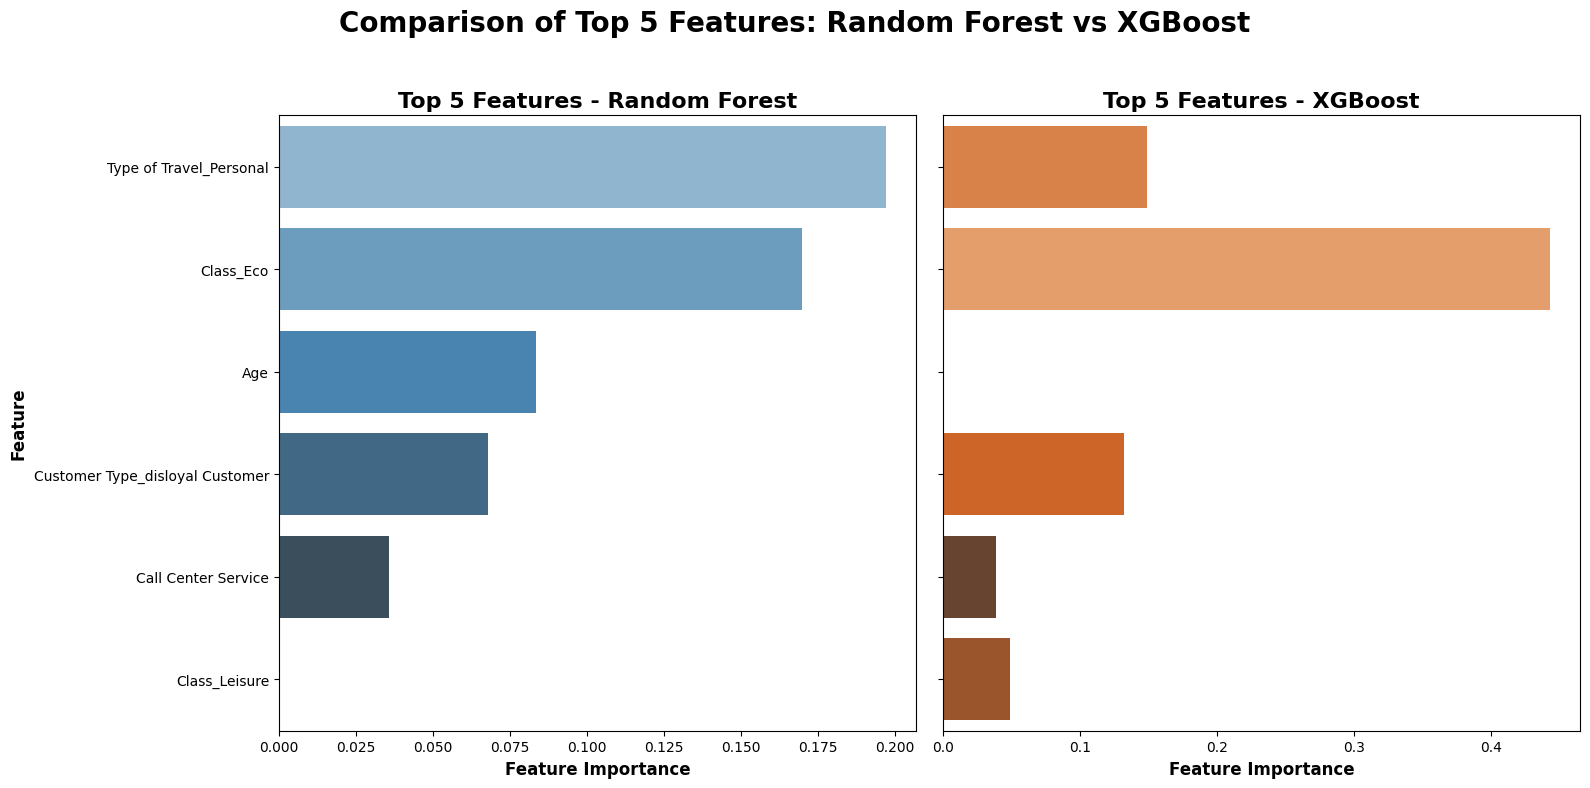

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Load dataset
dataset = pd.read_csv('balanced_dataset.csv')  # Adjust the path if needed

# Encode target: Satisfied -> 1, Dissatisfied -> 0
dataset['Satisfaction_Satisfied'] = dataset['Satisfaction_Satisfied'].map({'Satisfied': 1, 'Dissatisfied': 0})

# Split features and target
X = dataset.drop('Satisfaction_Satisfied', axis=1)
y = dataset['Satisfaction_Satisfied']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- Random Forest -----------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ----------------- XGBoost -----------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# ----------------- Plotting -----------------
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Random Forest Plot
sns.barplot(x='Importance', y='Feature', data=rf_importances.head(5), ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 5 Features - Random Forest', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Feature', fontsize=12, fontweight='bold')

# XGBoost Plot
sns.barplot(x='Importance', y='Feature', data=xgb_importances.head(5), ax=axes[1], palette='Oranges_d')
axes[1].set_title('Top 5 Features - XGBoost', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Feature Importance', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')  # Remove redundant y-axis label

# Common title
plt.suptitle('Comparison of Top 5 Features: Random Forest vs XGBoost', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 5. Feature Selection Using SHAP and LIME

#### 5.1 SHAP Feature Importance with XGBoost (Top 5 Features)

 99%|===================| 23739/23992 [01:15<00:00]        

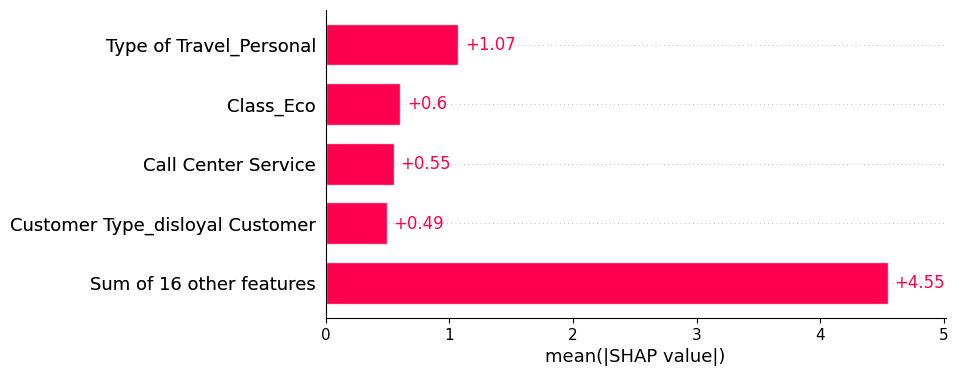

In [5]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv('balanced_dataset.csv')

# Encode the target column: Satisfied -> 1, Dissatisfied -> 0
dataset['Satisfaction_Satisfied'] = dataset['Satisfaction_Satisfied'].map({'Satisfied': 1, 'Dissatisfied': 0})

# Separate features and target
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# Convert object columns to one-hot encoded (dummy) variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Plot SHAP bar chart for top 5 features
shap.plots.bar(shap_values, max_display=5)

#### 5.2 Feature Importance with XGBoost using LIME

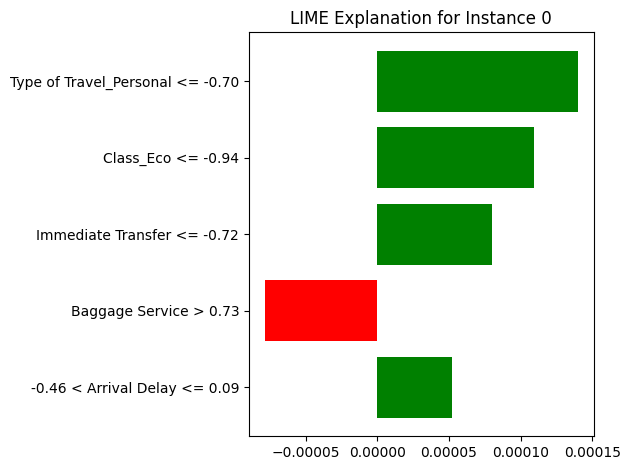

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# 1. Load dataset
dataset = pd.read_csv('balanced_dataset.csv')

# ✅ Encode target labels
dataset['Satisfaction_Satisfied'] = dataset['Satisfaction_Satisfied'].map({'Dissatisfied': 0, 'Satisfied': 1})
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# 2. One-hot encode categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the data (LIME performs better when data is normalized)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

# 7. Choose an instance to explain
i = 0  # index of the instance to explain
exp = explainer.explain_instance(X_test_scaled[i], model.predict_proba, num_features=5)

# 8. Show explanation
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Instance {i}")
plt.tight_layout()
plt.show()

#### Subplot

 96%|=================== | 5754/5998 [00:18<00:00]       

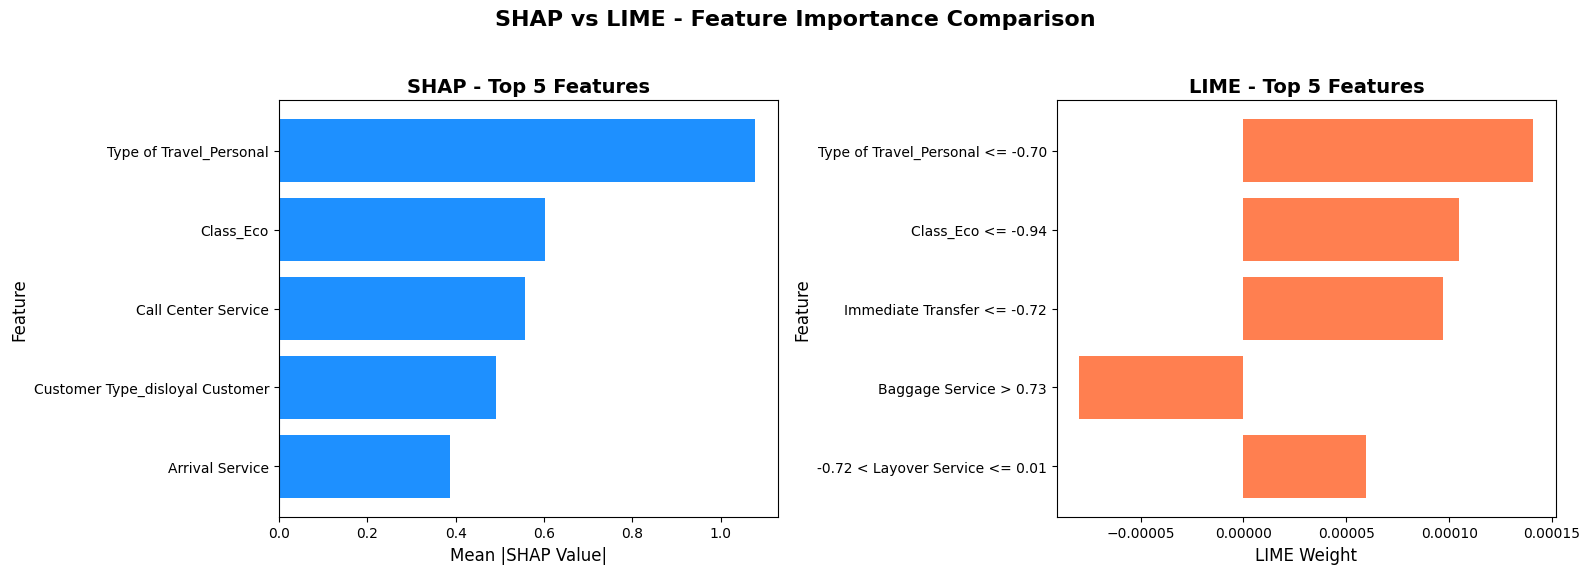

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
dataset = pd.read_csv('balanced_dataset.csv')

# Encode target variable
dataset['Satisfaction_Satisfied'] = dataset['Satisfaction_Satisfied'].map({'Dissatisfied': 0, 'Satisfied': 1})
y = dataset['Satisfaction_Satisfied']
X = dataset.drop('Satisfaction_Satisfied', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP explanation
explainer_shap = shap.Explainer(model, X_train_scaled)
shap_values = explainer_shap(X_test_scaled)

# Get mean absolute SHAP values
shap_values_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Importance', ascending=False).head(5)

# LIME explanation
explainer_lime = LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Not Satisfied', 'Satisfied'],
    mode='classification'
)

instance_index = 0
lime_exp = explainer_lime.explain_instance(X_test_scaled[instance_index], model.predict_proba, num_features=5)

# Convert LIME output to DataFrame
lime_df = pd.DataFrame(lime_exp.as_list(), columns=['Feature', 'Importance'])

# Plot SHAP and LIME
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# SHAP Plot
axes[0].barh(shap_values_df['Feature'][::-1], shap_values_df['Importance'][::-1], color='dodgerblue')
axes[0].set_title("SHAP - Top 5 Features", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Mean |SHAP Value|", fontsize=12)
axes[0].set_ylabel("Feature", fontsize=12)

# LIME Plot
axes[1].barh(lime_df['Feature'][::-1], lime_df['Importance'][::-1], color='coral')
axes[1].set_title("LIME - Top 5 Features", fontsize=14, fontweight='bold')
axes[1].set_xlabel("LIME Weight", fontsize=12)
axes[1].set_ylabel("Feature", fontsize=12)

plt.suptitle("SHAP vs LIME - Feature Importance Comparison", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()